In [ ]:
import pandas as pd

df = pd.read_csv('bbc-text.csv')
df = df[['text', 'category']]
df

,text,category
0,tv future in the hands of viewers with home th...,tech
1,worldcom boss left books alone former worldc...,business
2,tigers wary of farrell gamble leicester say ...,sport
3,yeading face newcastle in fa cup premiership s...,sport
4,ocean s twelve raids box office ocean s twelve...,entertainment
...,...,...
2220,cars pull down us retail figures us retail sal...,business
2221,kilroy unveils immigration policy ex-chatshow ...,politics
2222,rem announce new glasgow concert us band rem h...,entertainment
2223,how political squabbles snowball it s become c...,politics


In [ ]:
df.iloc[1500]['text']

'smartphones suffer skulls attack owners of some nokia smartphones are being warned to watch out for malicious wallpaper.  those downloading the software could find all the icons on their 7610 phone swapped for images of skulls. when installed the malicious program also locks many of the 7610 s functions making it hard to use and harder to repair. the program is only the latest in a series of viruses produced to attack mobile phones.  the file  nicknamed skulls  is thought to have surfaced on shareware sites where people can pick up free add-ons  such as wallpaper  games and ringtones  for their phones symbian said that it was not sure if the damage skulls does was intentional or simply a result of bad programming. soon after being discovered the file is thought to have been removed from the sites that were unwittingly harbouring it. the program is masquerading as software that creates new background images and themes for the main screen of the 7610 phone. the skulls program is labelle

In [ ]:
# One-hot-encoding label

category = pd.get_dummies(df.category)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='category')
new_df

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
# Mengubah dataframe ke tipe data numpy array
texts = new_df['text'].values
label = new_df[['business', 'entertainment', 'politics', 'sport', 'tech']].values

# Membagi train set dan test set
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_label, test_label = train_test_split(texts, label, test_size=0.2)

In [ ]:
# Stopword removal dan porter steemming teks
import numpy as np
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords

porterStemmer = PorterStemmer()

fixed_train_texts = []
for text in train_texts:
  removed_text = remove_stopwords(text)   # Stopword removal
  removed_text = porterStemmer.stem_sentence(removed_text) # Port steemming
  fixed_train_texts.append(removed_text)

fixed_train_texts = np.array(fixed_train_texts, dtype='O')   # Train set 

fixed_test_texts = []
for text in test_texts:
  removed_text = remove_stopwords(text)
  removed_text = porterStemmer.stem_sentence(removed_text) # Port steemming
  fixed_test_texts.append(removed_text)

fixed_test_texts = np.array(fixed_test_texts, dtype='O')  # Test set

In [ ]:
# Tokenisasi teks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(fixed_train_texts)
tokenizer.fit_on_texts(fixed_test_texts)
print(tokenizer.word_index)

{'<oov>': 1, 's': 2, 'said': 3, 'year': 4, 'mr': 5, 'new': 6, 'peopl': 7, 'game': 8, 'time': 9, 't': 10, 'like': 11, 'world': 12, 'govern': 13, 'film': 14, 'plai': 15, 'uk': 16, 'work': 17, 'compani': 18, 'firm': 19, 'best': 20, 'want': 21, 'win': 22, 'music': 23, 'told': 24, 'market': 25, 'number': 26, 'set': 27, 'sai': 28, 'come': 29, 'us': 30, 'includ': 31, 'plan': 32, 'labour': 33, '000': 34, 'month': 35, '1': 36, 'wai': 37, 'look': 38, 'need': 39, 'report': 40, 'bbc': 41, 'week': 42, 'servic': 43, 'player': 44, 'expect': 45, 'parti': 46, 'home': 47, 'good': 48, 'think': 49, 'sale': 50, '2': 51, 'countri': 52, 'minist': 53, 'million': 54, 'help': 55, 'second': 56, 'right': 57, 'go': 58, 'nation': 59, 'end': 60, 'elect': 61, 'mobil': 62, '2004': 63, 'start': 64, 'record': 65, 'open': 66, 'dai': 67, 'technolog': 68, 'group': 69, 'england': 70, '6': 71, 'gener': 72, 'offer': 73, 'blair': 74, 'public': 75, 'won': 76, 'award': 77, 'claim': 78, 'phone': 79, 'high': 80, 'share': 81, 'star

In [ ]:
# Sekuensi sampel 
train_sequences = tokenizer.texts_to_sequences(fixed_train_texts)
test_sequences = tokenizer.texts_to_sequences(fixed_test_texts)

# Padding sekuen
padded_train = pad_sequences(train_sequences)
padded_test = pad_sequences(test_sequences)

In [ ]:
# Buat arsitektur model ANN
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Tentukan optimizer dan loss function model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 117,637
Trainable params: 117,637
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Melatih model
hist = model.fit(
    padded_train, train_label,
    validation_data=(padded_test, test_label),
    epochs=20,
    batch_size=128,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/20
14/14 - 29s - loss: 1.6062 - accuracy: 0.2219 - val_loss: 1.5963 - val_accuracy: 0.2472 - 29s/epoch - 2s/step
Epoch 2/20
14/14 - 30s - loss: 1.6117 - accuracy: 0.2258 - val_loss: 1.5197 - val_accuracy: 0.3910 - 30s/epoch - 2s/step
Epoch 3/20
14/14 - 32s - loss: 1.5346 - accuracy: 0.4197 - val_loss: 1.5115 - val_accuracy: 0.3820 - 32s/epoch - 2s/step
Epoch 4/20
14/14 - 26s - loss: 1.4213 - accuracy: 0.3798 - val_loss: 1.2847 - val_accuracy: 0.4449 - 26s/epoch - 2s/step
Epoch 5/20
14/14 - 26s - loss: 1.1334 - accuracy: 0.4573 - val_loss: 1.0358 - val_accuracy: 0.4854 - 26s/epoch - 2s/step
Epoch 6/20
14/14 - 28s - loss: 0.8943 - accuracy: 0.6062 - val_loss: 0.8736 - val_accuracy: 0.6292 - 28s/epoch - 2s/step
Epoch 7/20
14/14 - 26s - loss: 0.5829 - accuracy: 0.8062 - val_loss: 0.5499 - val_accuracy: 0.7685 - 26s/epoch - 2s/step
Epoch 8/20
14/14 - 26s - loss: 0.3745 - accuracy: 0.8539 - val_loss: 0.5253 - val_accuracy: 0.8000 - 26s/epoch - 2s/step
Epoch 9/20

Akurasi telah mencap

<function matplotlib.pyplot.show(*args, **kw)>

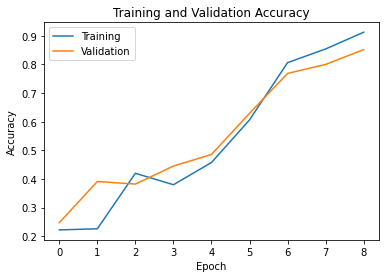

In [ ]:
# Plot akurasi model
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

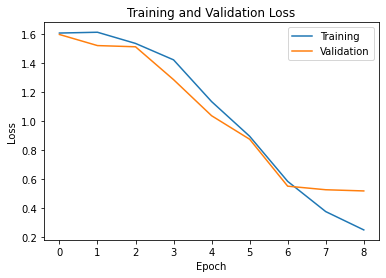

In [ ]:
# Plot loss model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show